     _step  epoch  epoch_train_loss  epoch_val_loss
0     1502      1      12947.956685    12924.055272
1     3005      2      12919.545237    12914.312275
2     4508      3      12913.218420    12910.150286
3     6011      4      12918.069006    12925.279459
4     7514      5      12930.148194    12931.608216
..     ...    ...               ...             ...
95  144287     96      14002.518274    13979.340460
96  145790     97      14031.573481    14007.529892
97  147293     98      14025.812562    14017.489216
98  148796     99      14024.850170    14052.718165
99  150299    100      14047.882708    14018.147774

[100 rows x 4 columns]


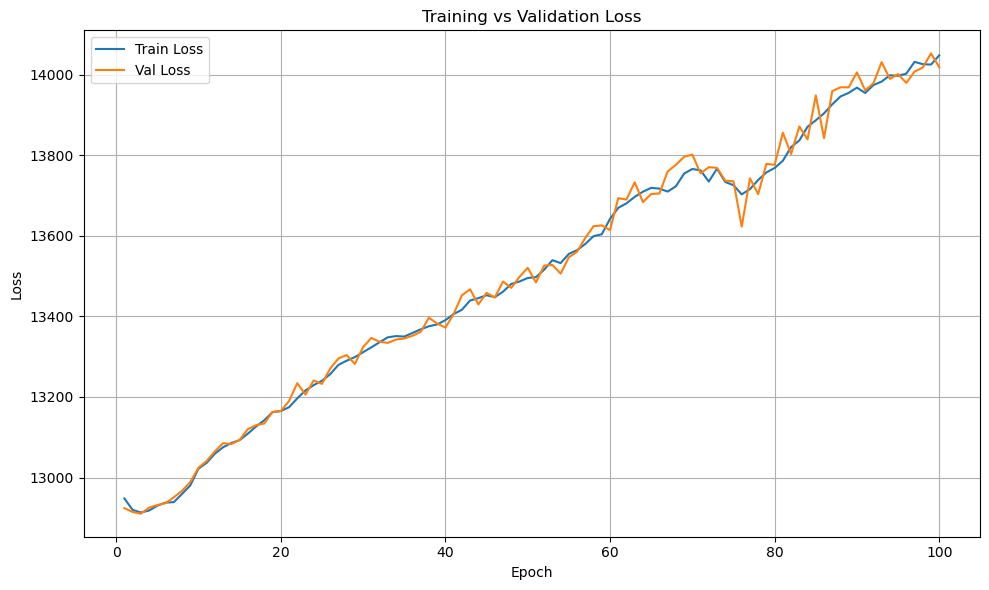

In [7]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the API
api = wandb.Api()

# Define the run path: "ENTITY/PROJECT/RUN_ID"
run_path = "dtu-vae-bbbc021/VAE_BBBC021/runs/bqk0oggj"
run = api.run(run_path)

# Get run history as a dataframe
history = run.history(keys=["epoch", "epoch_train_loss", "epoch_val_loss"])
print(history)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(history["epoch"], history["epoch_train_loss"], label="Train Loss")
plt.plot(history["epoch"], history["epoch_val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
api = wandb.Api()
run = api.run(run_path)
history2 = run.history(keys=["epoch", "epoch_recon_loss", "epoch_val_recon_loss"])

In [71]:
print(history2)

     _step  epoch  epoch_recon_loss  epoch_val_recon_loss
0     1502      1      12878.068410          12827.111025
1     3005      2      12816.288033          12811.354283
2     4508      3      12811.276467          12810.368827
3     6011      4      12809.568975          12808.516267
4     7514      5      12807.354174          12807.484673
..     ...    ...               ...                   ...
95  144287     96      12781.755142          12781.479226
96  145790     97      12781.611842          12782.198545
97  147293     98      12781.688285          12780.670627
98  148796     99      12781.406551          12781.273338
99  150299    100      12781.408266          12781.363020

[100 rows x 4 columns]


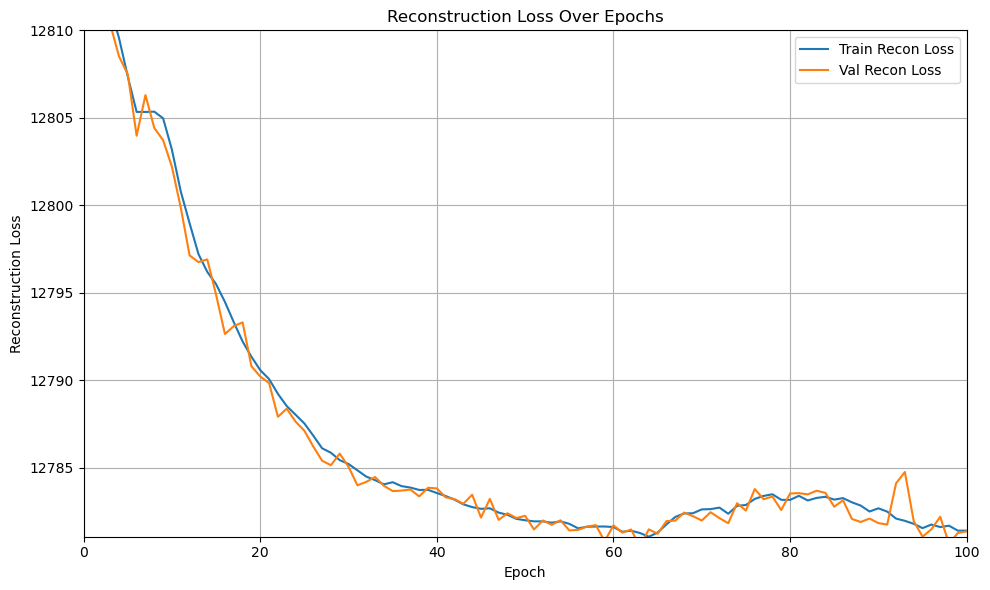

In [77]:
import numpy as np

# use the step from recon to place a point on the x-axis
recon_loss_dict = {
    "x": history2["epoch"],
    "y": history2["epoch_recon_loss"].values,
}

history2_dict = {
    "x": history2["epoch"],
    "y": history2["epoch_val_recon_loss"].values,
}

# Plot
plt.figure(figsize=(10, 6))
plt.plot(recon_loss_dict["x"], recon_loss_dict["y"])
plt.plot(history2_dict["x"], history2_dict["y"])
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss")
plt.title("Reconstruction Loss Over Epochs")
plt.xlim(0, 100)
plt.ylim(min(recon_loss_dict["y"]), 12810)
plt.legend(["Train Recon Loss", "Val Recon Loss"])
plt.grid(True)
plt.tight_layout()
plt.show()
